In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Data.csv')

In [3]:
X=df.drop('Bankruptcy',axis='columns')
y=df['Bankruptcy']

In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

1    6599
0    6599
Name: Bankruptcy, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)
y_train.value_counts()
y_test.value_counts()

1    1320
0    1320
Name: Bankruptcy, dtype: int64

In [8]:
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [9]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 5,kernel='rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(max_iter= 10000, random_state= 0)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [11]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Classsification Report: \n", classification_report(y_test,y_pred))

Classsification Report: 
               precision    recall  f1-score   support

           0       0.89      0.84      0.87      1320
           1       0.85      0.90      0.87      1320

    accuracy                           0.87      2640
   macro avg       0.87      0.87      0.87      2640
weighted avg       0.87      0.87      0.87      2640



In [12]:
accuracy_score(y_test,y_pred)

0.8712121212121212

In [13]:
confusion_matrix(y_test,y_pred)

array([[1111,  209],
       [ 131, 1189]], dtype=int64)

In [14]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=classifier,X= X_train, y =y_train, cv = 10)
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard_Deviation : {:.2f}%".format(accuracies.std()*100))


Accuracy : 87.24%
Standard_Deviation : 0.89%


Feature: 0, Score: -10.35495
Feature: 1, Score: 3.33244
Feature: 2, Score: -0.96582
Feature: 3, Score: 1.00326
Feature: 4, Score: -4.13213


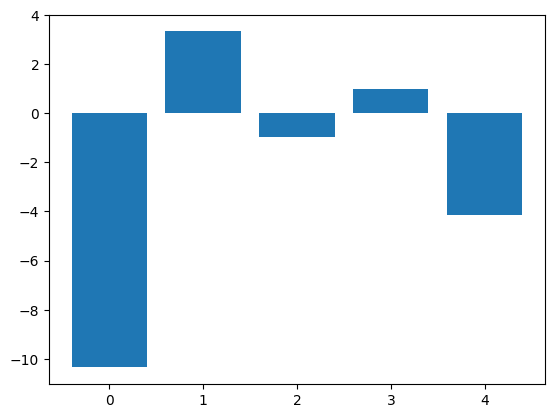

In [15]:
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()